In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [81]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [82]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [84]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [85]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [86]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [87]:
df.reset_index(inplace=True)

In [88]:
df

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        244 non-null    int64 
 1   day          244 non-null    object
 2   month        244 non-null    object
 3   year         244 non-null    object
 4   Temperature  244 non-null    object
 5    RH          244 non-null    object
 6    Ws          244 non-null    object
 7   Rain         244 non-null    object
 8   FFMC         244 non-null    object
 9   DMC          244 non-null    object
 10  DC           244 non-null    object
 11  ISI          244 non-null    object
 12  BUI          244 non-null    object
 13  FWI          244 non-null    object
 14  Classes      244 non-null    object
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [90]:
df.rename(columns={" RH":"Relative Humidity"," Ws":"Wind Speed"},inplace=True)
df.rename(columns={"Rain ":"Rain","Classes  ":"Classes"},inplace=True)
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'Relative Humidity',
       'Wind Speed', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI',
       'Classes'],
      dtype='object')

In [91]:
df.tail()

,index,day,month,year,Temperature,Relative Humidity,Wind Speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [92]:
df.drop("index",axis=1,inplace=True)
df

,day,month,year,Temperature,Relative Humidity,Wind Speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [93]:
df.iloc[122]

day                          day
month                      month
year                        year
Temperature          Temperature
Relative Humidity             RH
Wind Speed                    Ws
Rain                       Rain 
FFMC                        FFMC
DMC                          DMC
DC                            DC
ISI                          ISI
BUI                          BUI
FWI                          FWI
Classes                Classes  
Name: 122, dtype: object

In [94]:
df.drop(index=122,inplace=True)
df.reset_index(drop=True,inplace=True)

In [95]:
df[["day","month","year","Temperature","Relative Humidity","Wind Speed"]]=df[["day","month","year","Temperature","Relative Humidity","Wind Speed"]].astype(int)
df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]]=df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]].astype(float)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                243 non-null    int32  
 1   month              243 non-null    int32  
 2   year               243 non-null    int32  
 3   Temperature        243 non-null    int32  
 4   Relative Humidity  243 non-null    int32  
 5   Wind Speed         243 non-null    int32  
 6   Rain               243 non-null    float64
 7   FFMC               243 non-null    float64
 8   DMC                243 non-null    float64
 9   DC                 243 non-null    float64
 10  ISI                243 non-null    float64
 11  BUI                243 non-null    float64
 12  FWI                243 non-null    float64
 13  Classes            243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 21.0+ KB


In [97]:
df["Classes"] = df["Classes"].str.strip()

In [98]:
df["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

In [99]:
df = pd.get_dummies(df,columns=["Classes"],drop_first=True)
df

,day,month,year,Temperature,Relative Humidity,Wind Speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,True
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,True
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,True
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,True
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,False
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,True
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,True
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,True


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                243 non-null    int32  
 1   month              243 non-null    int32  
 2   year               243 non-null    int32  
 3   Temperature        243 non-null    int32  
 4   Relative Humidity  243 non-null    int32  
 5   Wind Speed         243 non-null    int32  
 6   Rain               243 non-null    float64
 7   FFMC               243 non-null    float64
 8   DMC                243 non-null    float64
 9   DC                 243 non-null    float64
 10  ISI                243 non-null    float64
 11  BUI                243 non-null    float64
 12  FWI                243 non-null    float64
 13  Classes_not fire   243 non-null    bool   
dtypes: bool(1), float64(7), int32(6)
memory usage: 19.4 KB


In [101]:
df["Classes_not fire"] = df["Classes_not fire"].astype(int)
df

,day,month,year,Temperature,Relative Humidity,Wind Speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [102]:
df.drop(["day","month","year"],axis=1,inplace=True)
df

,Temperature,Relative Humidity,Wind Speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_not fire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


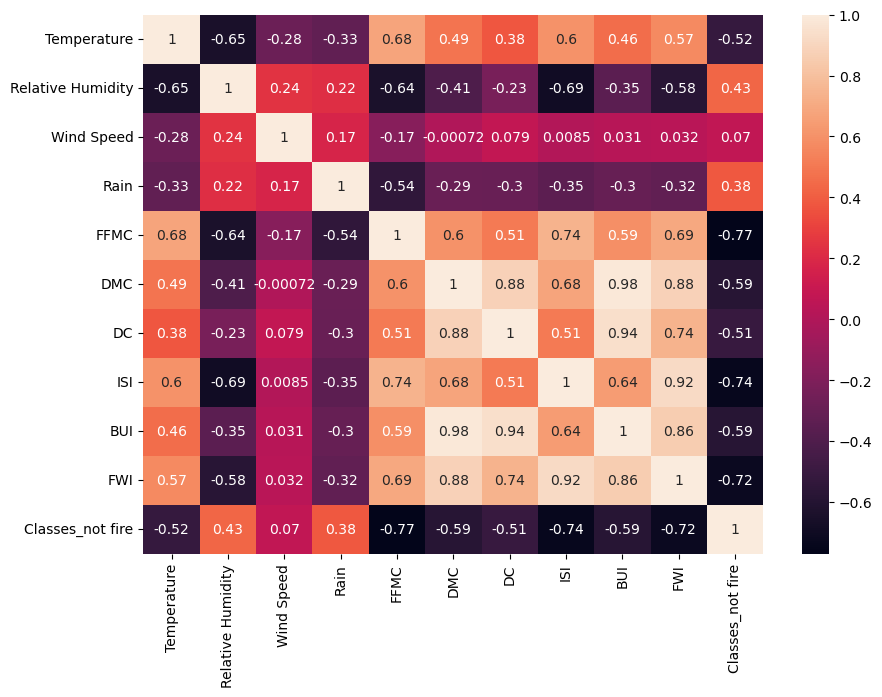

In [103]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [104]:
X = df.drop("FWI",axis=1)
y = df["FWI"]

<Axes: >

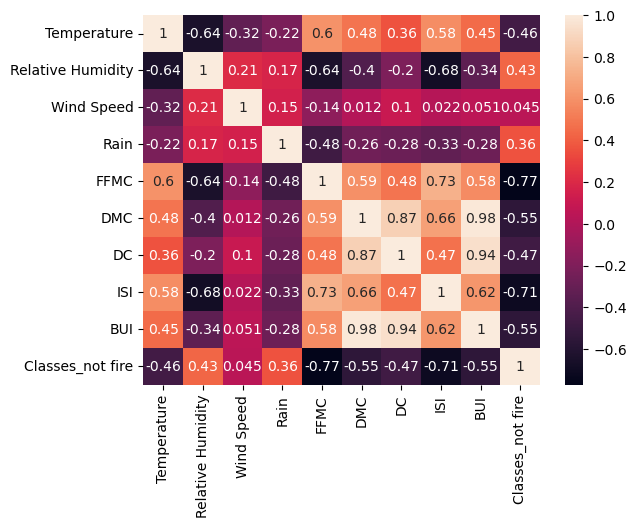

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)
sns.heatmap(X_train.corr(),annot=True)

In [106]:
df.corr().iloc[1,2] # satır,sütun

0.244048382217469

In [107]:
def corr_for_dropping(df,threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(corr.shape[1]): # i-> columns
        for j in range(i): # j-> rows
            if abs(corr.iloc[i,j])>threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [108]:
columns_for_dropping=corr_for_dropping(X_train,0.85)
columns_for_dropping

{'BUI', 'DC'}

In [109]:
X_train.drop(columns_for_dropping,axis=1,inplace=True)
X_test.drop(columns_for_dropping,axis=1,inplace=True)
X_train.columns

Index(['Temperature', 'Relative Humidity', 'Wind Speed', 'Rain', 'FFMC', 'DMC',
       'ISI', 'Classes_not fire'],
      dtype='object')

In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

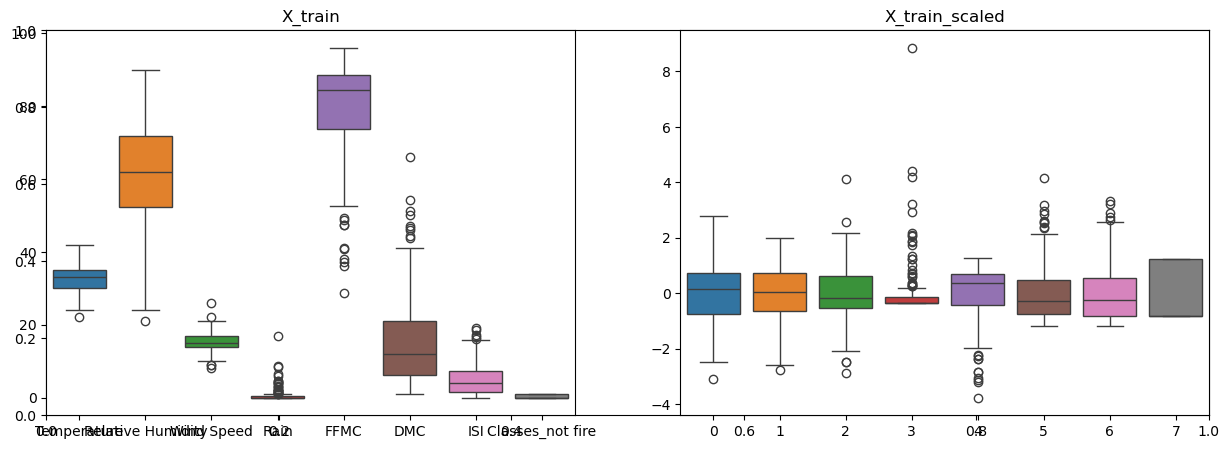

In [111]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [112]:
lineer = LinearRegression()
lineer.fit(X_train_scaled,y_train)
y_preds = lineer.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_preds)
mse  = mean_squared_error(y_test,y_preds)
r2  = r2_score(y_test,y_preds)
print(f"MAE: {mae} | MSE: {mse} | R2: {r2}")

MAE: 0.7578733230774961 | MSE: 0.9675795649907475 | R2: 0.9821954195550582


In [113]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_preds = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_preds)
mse  = mean_squared_error(y_test,y_preds)
r2  = r2_score(y_test,y_preds)
print(f"MAE: {mae} | MSE: {mse} | R2: {r2}")

MAE: 1.2162726338006296 | MSE: 2.6029377368132205 | R2: 0.9521029422229386


In [114]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_preds = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_preds)
mse  = mean_squared_error(y_test,y_preds)
r2  = r2_score(y_test,y_preds)
print(f"MAE: {mae} | MSE: {mse} | R2: {r2}")

MAE: 0.7697668610956673 | MSE: 0.9885122439331868 | R2: 0.9818102341091849


In [115]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_preds = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_preds)
mse  = mean_squared_error(y_test,y_preds)
r2  = r2_score(y_test,y_preds)
print(f"MAE: {mae} | MSE: {mse} | R2: {r2}")

MAE: 1.7493286471090155 | MSE: 5.569160502382822 | R2: 0.8975210207375393


In [116]:
# lasso cross validation
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_preds = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_preds)
mse  = mean_squared_error(y_test,y_preds)
r2  = r2_score(y_test,y_preds)
print(f"MAE: {mae} | MSE: {mse} | R2: {r2}")

MAE: 0.7587557358196071 | MSE: 0.9830124911079539 | R2: 0.9819114359071013


In [117]:
# ridge cross validation
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_preds = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_preds)
mse  = mean_squared_error(y_test,y_preds)
r2  = r2_score(y_test,y_preds)
print(f"MAE: {mae} | MSE: {mse} | R2: {r2}")

MAE: 0.7697668610956673 | MSE: 0.9885122439331868 | R2: 0.9818102341091849


In [118]:
# elastic net cross validation
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_preds = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_preds)
mse  = mean_squared_error(y_test,y_preds)
r2  = r2_score(y_test,y_preds)
print(f"MAE: {mae} | MSE: {mse} | R2: {r2}")

MAE: 0.793275786939876 | MSE: 1.0449096851672246 | R2: 0.980772456115858
